# Modeling for casr prices
## importing the pre-processed data With EDA

In [3]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork', 'seaborn'])

In [4]:
# imporing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# reading data 
df = pd.read_csv("automobileEDA.csv")
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1


In [7]:
pd.set_option("display.max_columns", None)

## 1- Simple linear regression model

In [9]:
# import the methode
from sklearn.linear_model import LinearRegression

In [10]:
# decide x,y 
x = df[["highway-mpg"]]
y= df[["price"]]

lm = LinearRegression()

lm.fit(x, y)
      

LinearRegression()

In [11]:
yhat = lm.predict(x)

In [12]:
yhat[0:7]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011]])

In [18]:
# finding the equation 
a = lm.intercept_
b = lm.coef_

print(f'linear model equation is : price = {a} + {b} highway-mpg')

linear model equation is : price = [38423.30585816] + [[-821.73337832]] highway-mpg


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

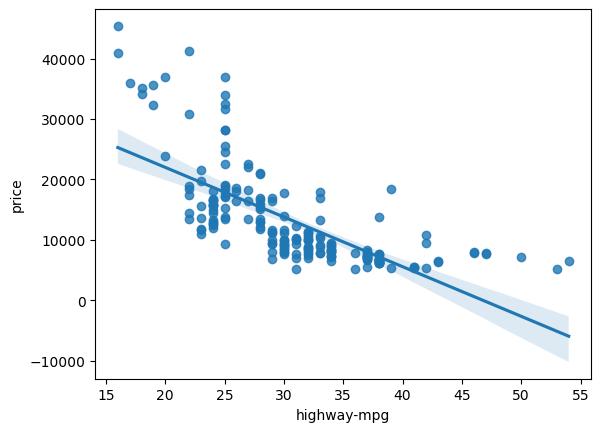

In [19]:
# visualizing the reg
sns.regplot( x = df["highway-mpg"], y= df["price"], data = df)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

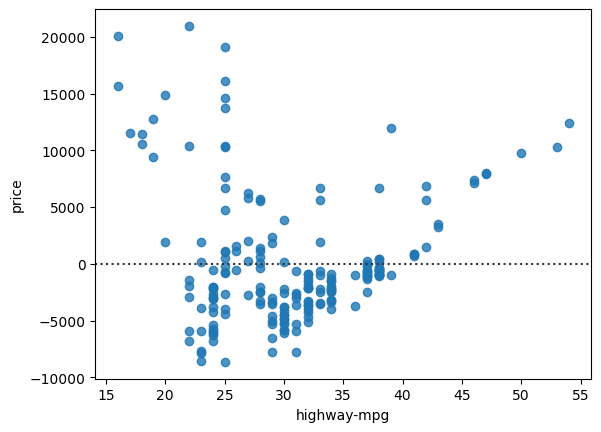

In [20]:
# visulaize the resuidual 
sns.residplot(x = df["highway-mpg"], y= df["price"], data = df)

In [66]:
# Evaluating the model using R square and mean Square error

# R Square 
print("The R Square is: ", lm.score(x,y))

# Mean Square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, yhat)

print("The Mean Squared Error is ", mse)

The R Square is:  0.4965911884339176
The Mean Squared Error is  11980366.870726489


**I can Find that the residuale has trend so linear regression is not the best fit**
#### So, let's try the polynomial regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures

pl = PolynomialFeatures(degree = 2)

pl_trans = pl.fit_transform( df[["highway-mpg"]])

print(df[["highway-mpg"]].shape)
print(pl_trans.shape)

(201, 1)
(201, 3)


In [69]:
#prediction 
pl.fit(df[["highway-mpg"]], df[['price']])
yhat_multi = pl.predict(df[["highway-mpg"]])

# Evaluating the model using R square and mean Square error

# R Square 
print("The R Square is: ", pl_trans.score(df[["highway-mpg"]],y))

# Mean Square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[['price']], yhat_multi)

print("The Mean Squared Error is ", mse)

<class 'AttributeError'>: 'PolynomialFeatures' object has no attribute 'predict'

#### Linear regression model For the Engine Size

In [70]:
lm1 = LinearRegression()

lm1.fit(df[["engine-size"]], df[["price"]])

yhat1 = lm1.predict(df[["engine-size"]])

print(f' linear regression equation is : price = {lm1.intercept_} + {lm1.coef_} engine-size')

 linear regression equation is : price = [-7963.33890628] + [[166.86001569]] engine-size


<AxesSubplot:xlabel='engine-size', ylabel='price'>

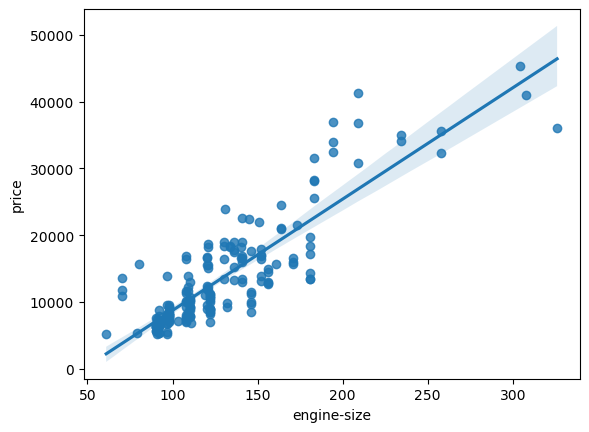

In [23]:
sns.regplot( x = df["engine-size"], y= df["price"], data = df)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

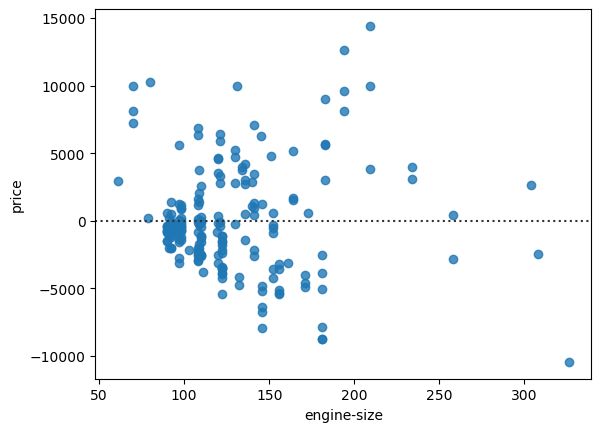

In [24]:
sns.residplot(x = df["engine-size"], y= df["price"], data = df)

In [71]:
# Evaluating the model using R square and mean Square error

# R Square 
print("The R Square is: ", lm1.score(df[["engine-size"]], df[["price"]]))

# Mean Square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[["price"]], yhat1)

print("The Mean Squared Error is ", mse)

The R Square is:  0.7609686443622008
The Mean Squared Error is  15021126.02517414


## results
**the residual are scattered so linear regression is good**

In [25]:
# repeating same for peak- rpm

lm2 = LinearRegression()

lm2.fit(df[["peak-rpm"]], df[["price"]])

lm2.predict(df[["peak-rpm"]])

print(f' linear regression equation is : price = {lm2.intercept_} + {lm2.coef_} peak-rpm')

 linear regression equation is : price = [21851.01468614] + [[-1.68902902]] peak-rpm


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

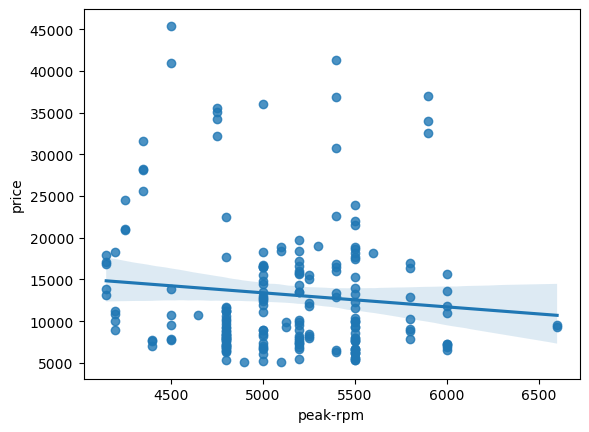

In [26]:
sns.regplot( x = df["peak-rpm"], y= df["price"], data = df)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

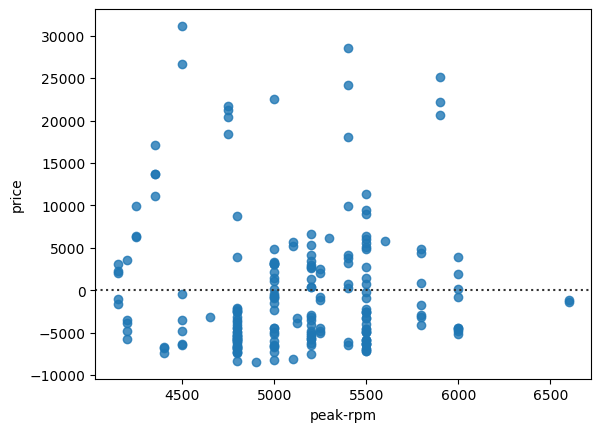

In [27]:
sns.residplot( x = df["peak-rpm"], y= df["price"], data = df)

## let's correlate them all 

In [28]:
corr = df[["highway-mpg", "peak-rpm", "engine-size", "price"]].corr()
corr

,highway-mpg,peak-rpm,engine-size,price
highway-mpg,1.000000,-0.058598,-0.679571,-0.704692
peak-rpm,-0.058598,1.000000,-0.256733,-0.101616
engine-size,-0.679571,-0.256733,1.000000,0.872335
price,-0.704692,-0.101616,0.872335,1.000000


<AxesSubplot:>

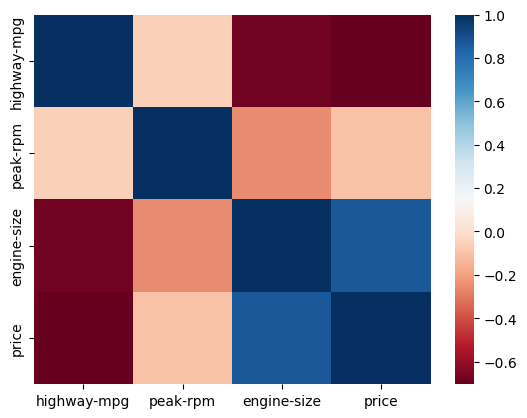

In [30]:
sns.heatmap(corr, cmap = "RdBu")

## Result
There is great correlation btw price and  engine size( pos corr) and highway-mpg (neg corr) where there is no correlation btw price and peak-rpm

## 2- Multiple Linear Regression Model 

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [33]:
lm_multi = LinearRegression()

z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

lm_multi.fit(z, df[["price"]])


LinearRegression()

In [34]:
lm_multi.intercept_

array([-15806.62462633])

In [37]:
lm_multi.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?
<b>Price</b> = -15806.62462633 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


<AxesSubplot:xlabel='price', ylabel='Density'>

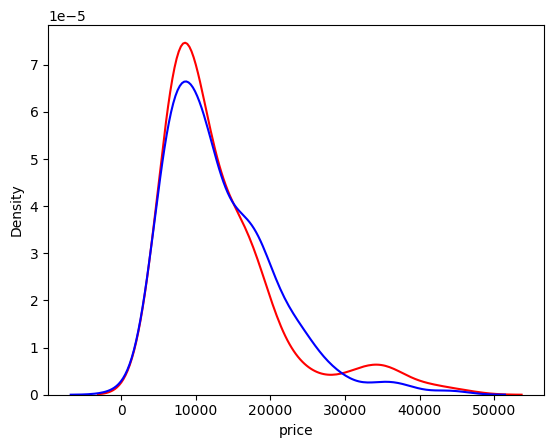

In [44]:
# Visualizing the multiple regression model 
ax1 = sns.distplot(df["price"], hist= False, color = "r")

yhat = lm_multi.predict(z)

sns.distplot(yhat, hist = False, color = "b", ax = ax1)

## Results : 
looks like a good model but still there is some room for improvement

### let's try the polynomial regression for better modeling

In [56]:
pl2 = PolynomialFeatures(degree = 2)
pl2_z =pl2.fit_transform(z)

print(z.shape)
print(pl2_z.shape)

(201, 4)
(201, 15)


## Pipelines for ploynomail Regression

In [61]:
# importing libararies
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# create an input for the pipeline 
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias= False)), ('model', LinearRegression())]

#create the pipeline
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
#  let's train the model 

# as it could give me an error if any of the predictors are  not float-- so let's make sure
z = z.astype('float64')
pipe.fit(z, df[["price"]])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
ypipe = pipe.predict(z)

ypipe[0:5]

array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555],
       [16136.29619164]])

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>

<p>Comparing the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


## ConClusion
<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
